# EXPLORATORY DATA ANALYSIS ON THE TITANIC DATASET

Dataset was gotten from kaggle: https://www.kaggle.com/c/titanic/data

    Survival - Survival (0 = No; 1 = Yes). Not included in test.csv file.
    Pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
    Name - Name
    Sex - Sex
    Age - Age
    Sibsp - Number of Siblings/Spouses Aboard
    Parch - Number of Parents/Children Aboard
    Ticket - Ticket Number
    Fare - Passenger Fare
    Cabin - Cabin
    Embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [1]:
# importing the necessary libraries

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [47]:
# setting the figsize and density

plt.rcParams['figure.figsize'] = [7, 4]
plt.rcParams['figure.dpi'] = 80

In [4]:
# loading the dataset
df = sns.load_dataset('titanic')

In [5]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
cols = df.columns
cols

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [7]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [11]:
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

## VISUALIZATION ANALYSIS

In [111]:
plt.style.use('seaborn-bright')

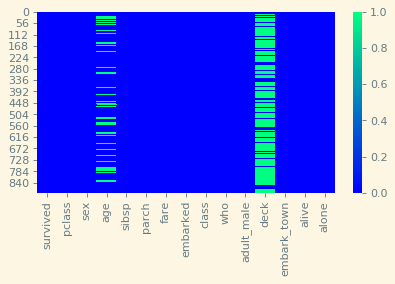

In [13]:
# checking the heatmap of the missing values
sns.heatmap(df.isnull(), cmap = 'winter');

In [14]:
corrmat = df.corr()
corrmat

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


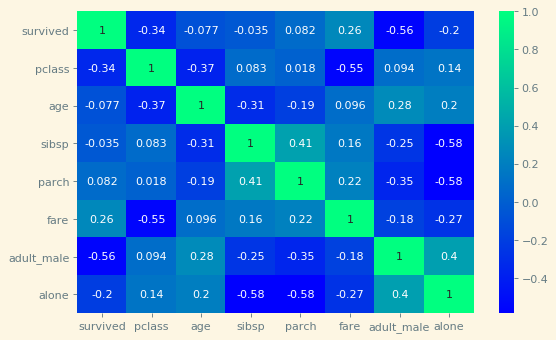

In [18]:
# plotting the correlation
sns.heatmap(corrmat, annot=True, cmap='winter');

## UNIVARIATE ANALYSIS

In [19]:
print(list(cols))

['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone']


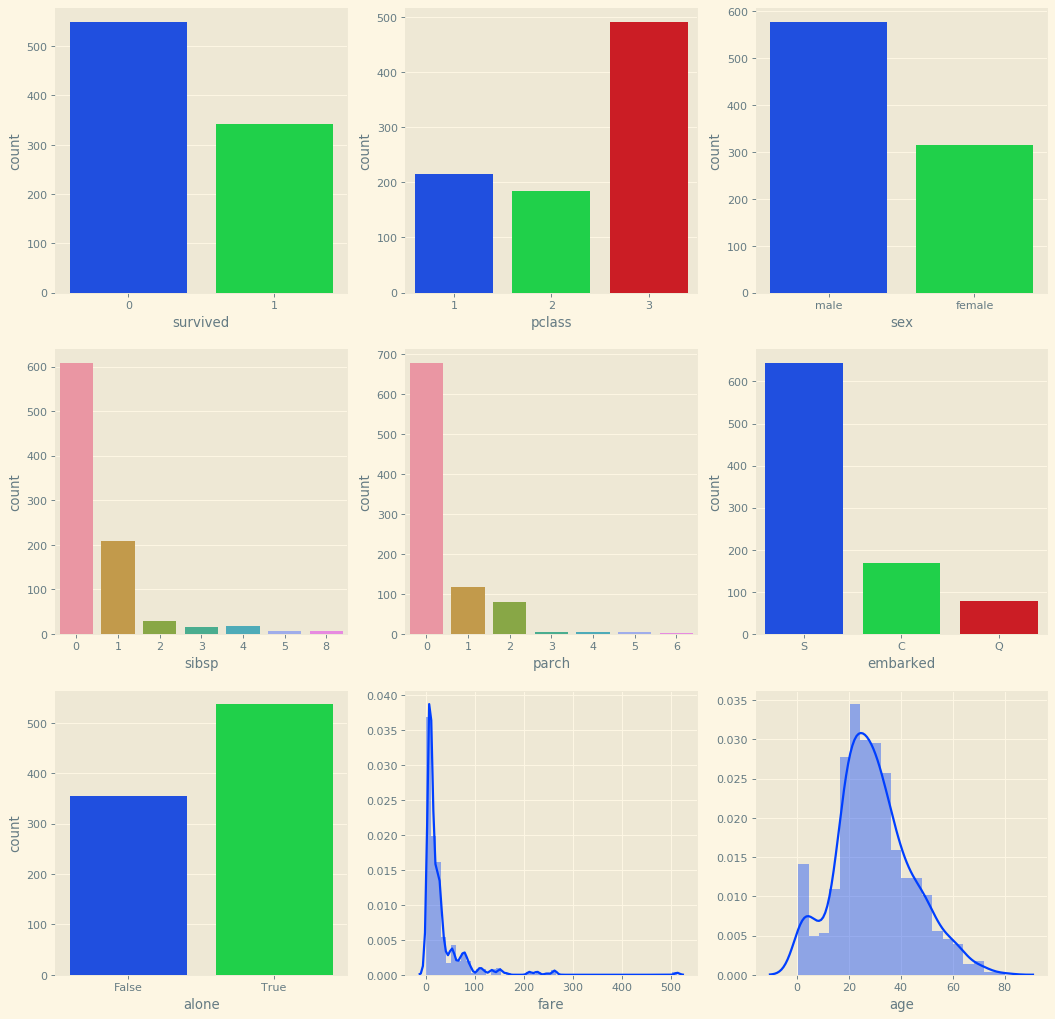

In [112]:
fig, ax = plt.subplots(3, 3, figsize = (16, 16))

sns.countplot('survived', data = df, ax = ax[0][0])
sns.countplot('pclass', data = df, ax = ax[0][1])
sns.countplot('sex', data = df, ax = ax[0][2])
sns.countplot('sibsp', data = df, ax = ax[1][0])
sns.countplot('parch', data = df, ax = ax[1][1])
sns.countplot('embarked', data =df, ax = ax[1][2])
sns.countplot('alone', data = df, ax = ax[2][0])

sns.distplot(df['fare'], kde = True, ax = ax[2][1])
sns.distplot(df['age'], kde = True, ax = ax[2][2]);

## THE SURVIVED

In [21]:
# analysing the survived passengers data
df['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

0 = NO, 
1 = YES

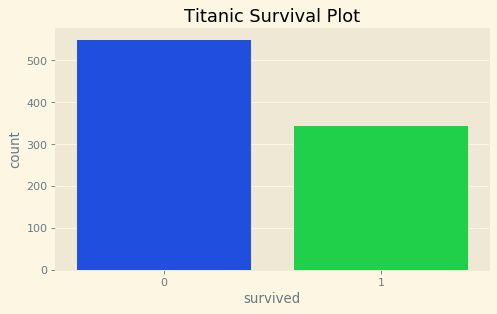

In [113]:
sns.countplot('survived', data = df)
plt.title('Titanic Survival Plot')
plt.show()

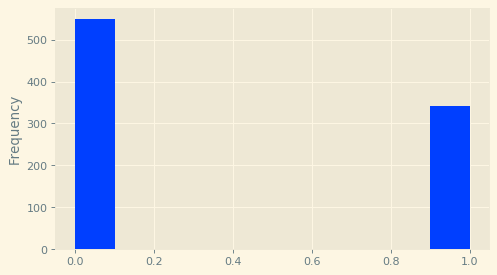

In [114]:
df['survived'].plot.hist();

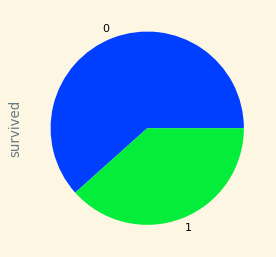

In [115]:
df['survived'].value_counts().plot.pie();

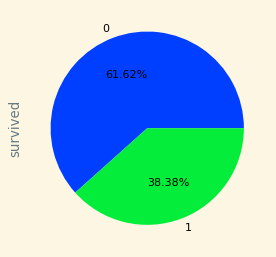

In [117]:
df['survived'].value_counts().plot.pie(autopct = '%1.2f%%');

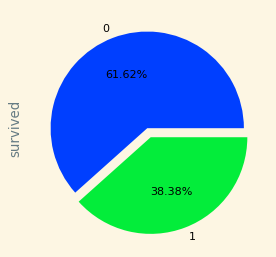

In [118]:
explode = [0, 0.1]
df['survived'].value_counts().plot.pie(explode = explode, autopct = '%1.2f%%');

## PCLASS
    Analysis on the passenger class (1 = 1st; 2 = 2nd; 3 = 3rd)

In [38]:
df['pclass'].value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

In [39]:
df.groupby(['pclass', 'survived'])['survived'].count()

pclass  survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: survived, dtype: int64

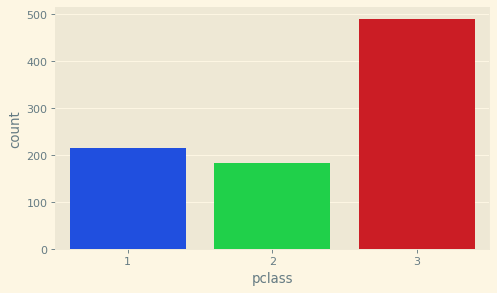

In [119]:
sns.countplot('pclass', data = df);

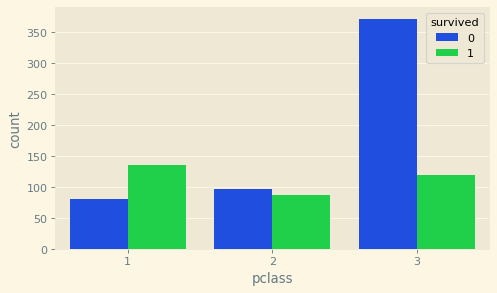

In [120]:
sns.countplot('pclass', data = df, hue = 'survived');

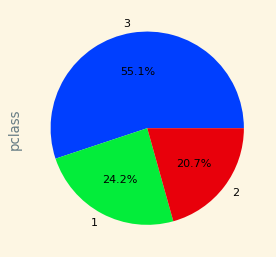

In [121]:
df['pclass'].value_counts().plot.pie(autopct = "%1.1f%%");

## SEX

In [43]:
df['sex'].value_counts()

male      577
female    314
Name: sex, dtype: int64

In [44]:
df.groupby(['sex', 'survived'])['survived'].count()

sex     survived
female  0            81
        1           233
male    0           468
        1           109
Name: survived, dtype: int64

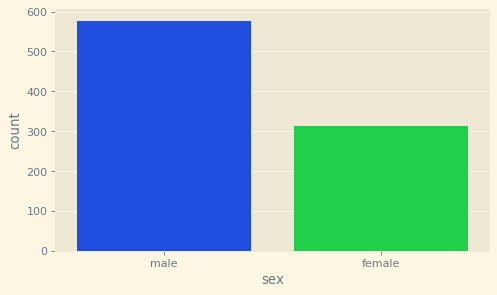

In [122]:
sns.countplot('sex', data = df);

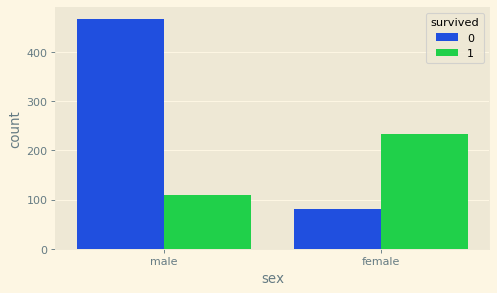

In [123]:
sns.countplot('sex', data = df, hue = 'survived');

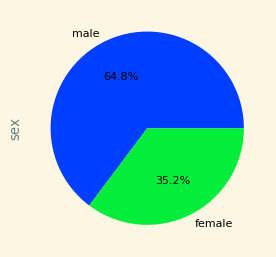

In [124]:
df['sex'].value_counts().plot.pie(autopct = '%1.1f%%');

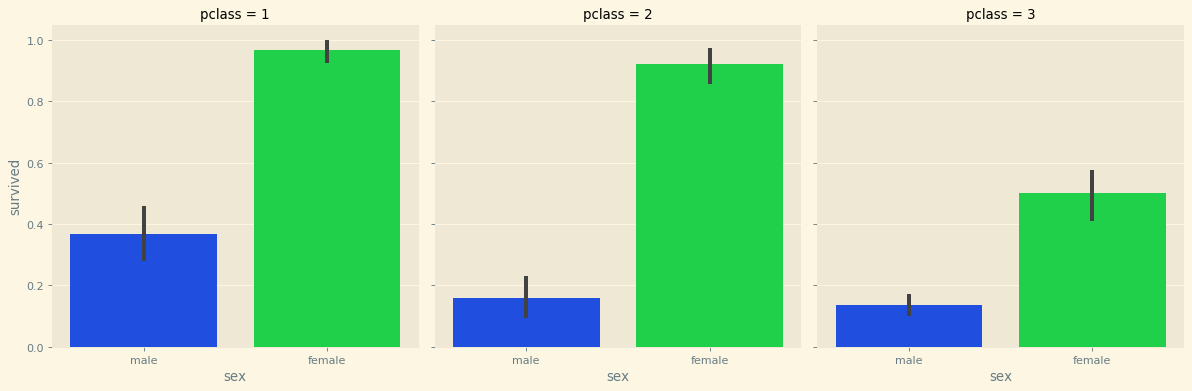

In [125]:
sns.catplot(x = 'sex', y = 'survived', kind = 'bar', data = df, col = 'pclass');

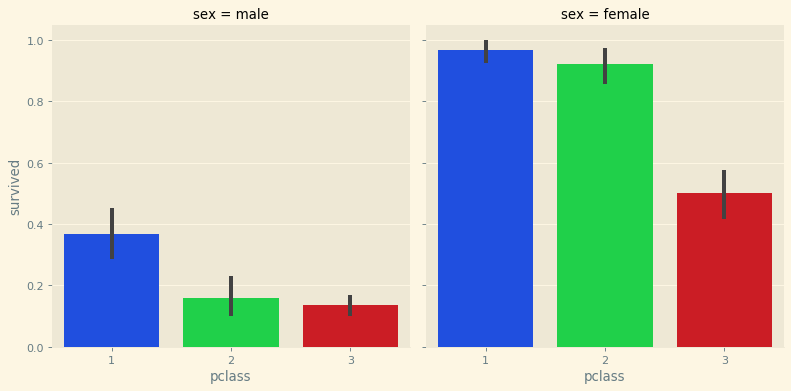

In [126]:
sns.catplot(x = 'pclass', y = 'survived', kind = 'bar', data = df, col = 'sex');

## AGE

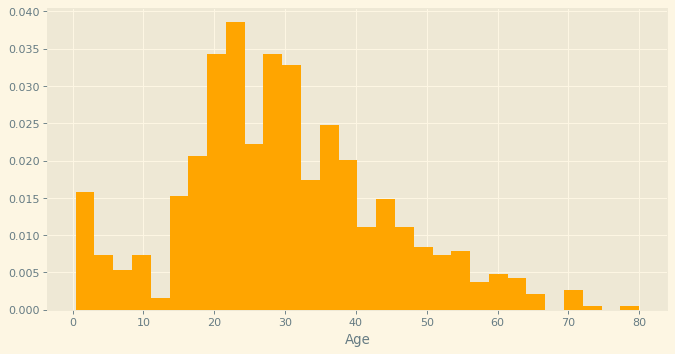

In [73]:
df['age'].hist(bins = 30, density = True, color = 'orange', figsize = (10, 5))
plt.xlabel('Age')
plt.show()

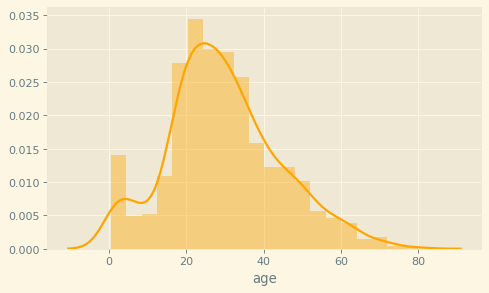

In [76]:
sns.distplot(df['age'],color = 'orange');

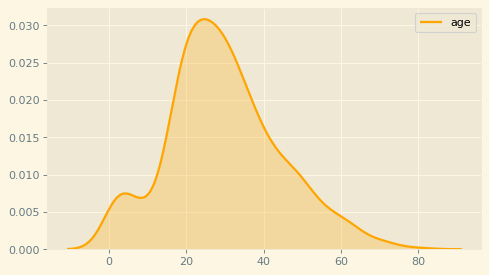

In [77]:
sns.kdeplot(df['age'], shade = True, color = 'orange');

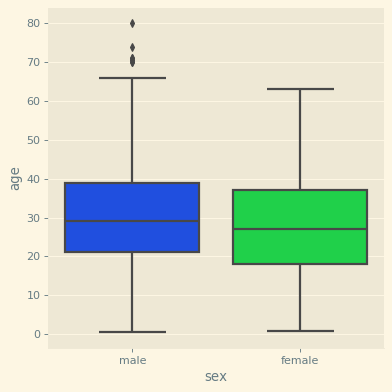

In [127]:
sns.catplot(x = 'sex', y = 'age', data = df, kind = 'box');

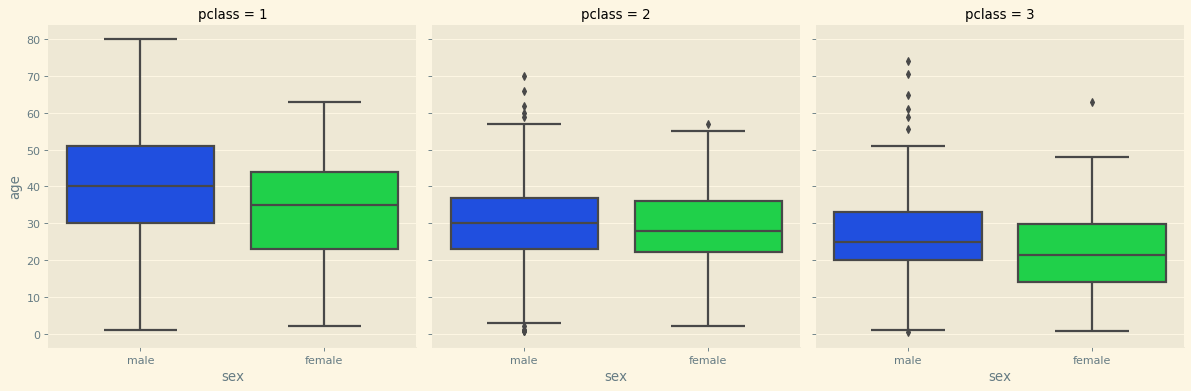

In [128]:
sns.catplot(x = 'sex', y = 'age', data = df, kind = 'box', col = 'pclass');

## FARE
    Passenger Fare

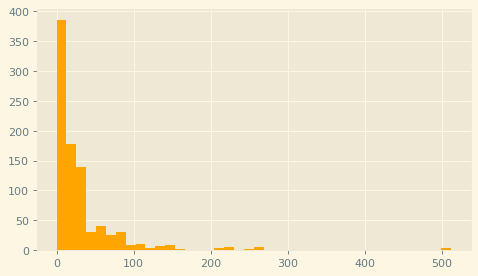

In [74]:
df['fare'].hist(bins = 40, color = 'orange');

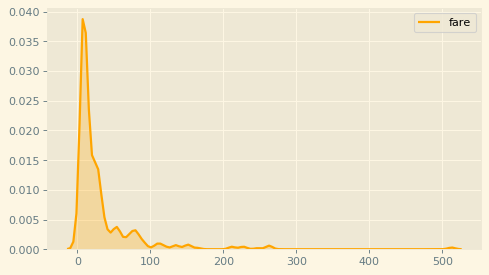

In [78]:
sns.kdeplot(df['fare'], shade = True, color = 'orange');

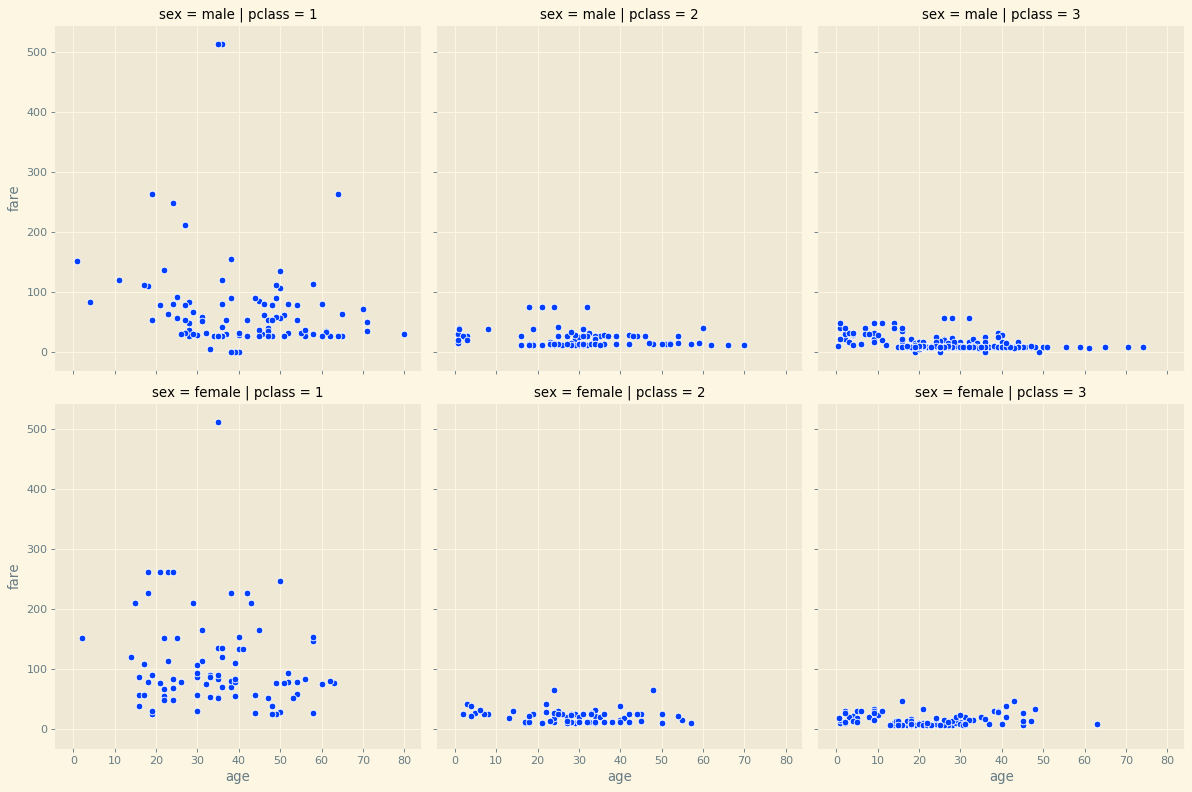

In [129]:
sns.relplot(x = 'age', y = 'fare', data = df, row = 'sex', col = 'pclass');

## SIBSP
    Number of Siblings/Spouses Aboard

In [80]:
df['sibsp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: sibsp, dtype: int64

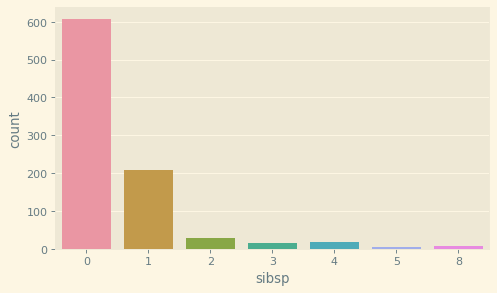

In [130]:
sns.countplot('sibsp', data = df);

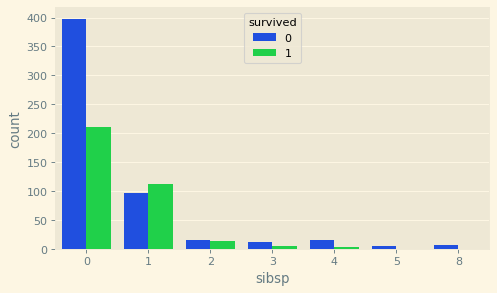

In [131]:
sns.countplot('sibsp', data = df, hue = 'survived');

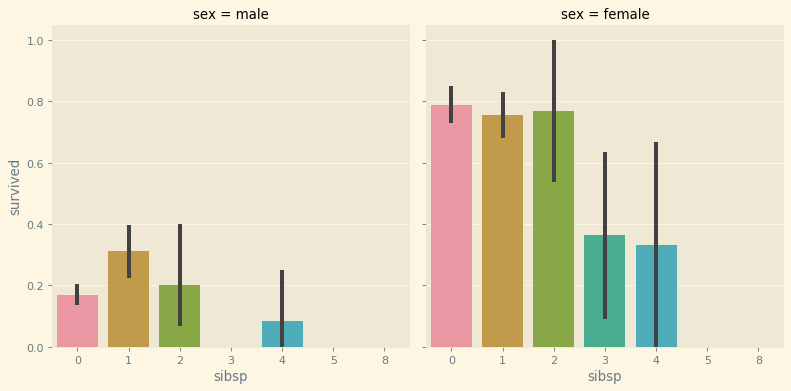

In [132]:
sns.catplot(x = 'sibsp', y = 'survived', kind = 'bar', data = df, col = 'sex');

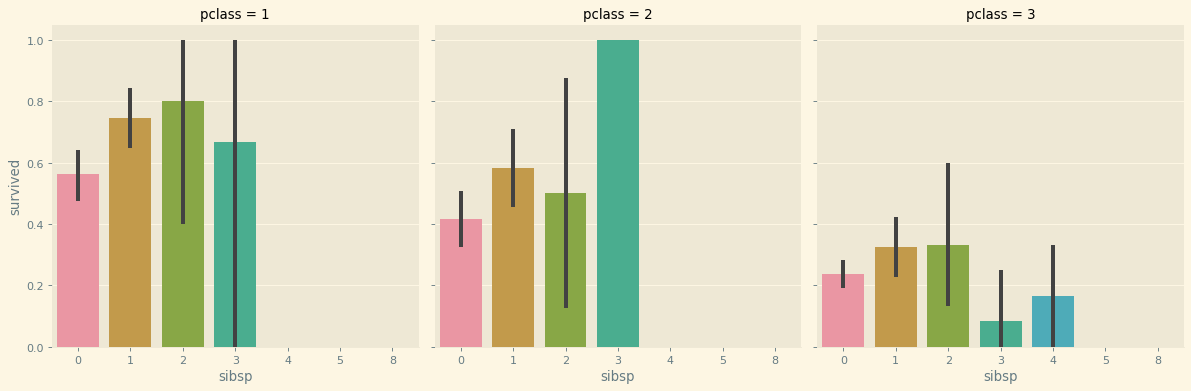

In [133]:
sns.catplot(x = 'sibsp', y = 'survived', kind = 'bar', data = df, col = 'pclass');

## PARCH
     Number of Parents/Children Aboard

In [89]:
df['parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: parch, dtype: int64

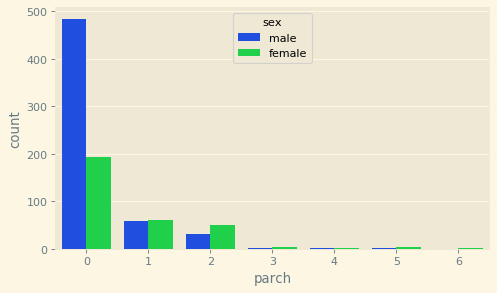

In [134]:
sns.countplot('parch', data = df, hue = 'sex');

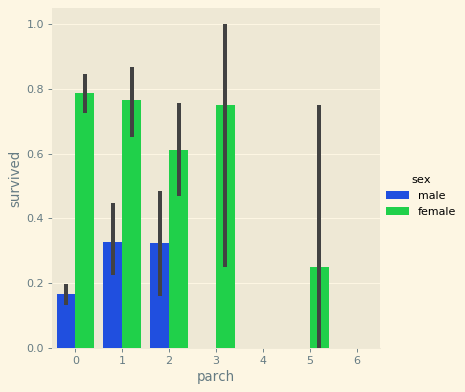

In [135]:
sns.catplot(x = 'parch', y = 'survived', data = df, kind = 'bar', hue = 'sex');

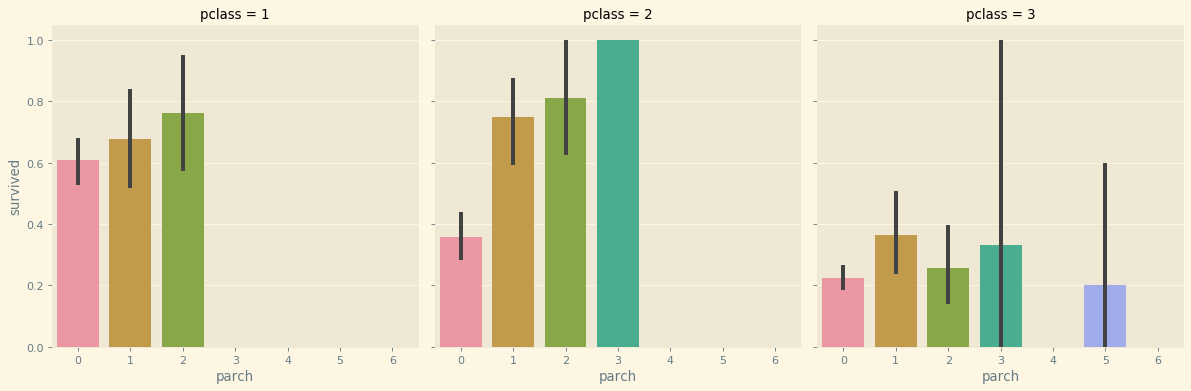

In [136]:
sns.catplot(x = 'parch', y = 'survived', kind = 'bar', data = df, col = 'pclass');

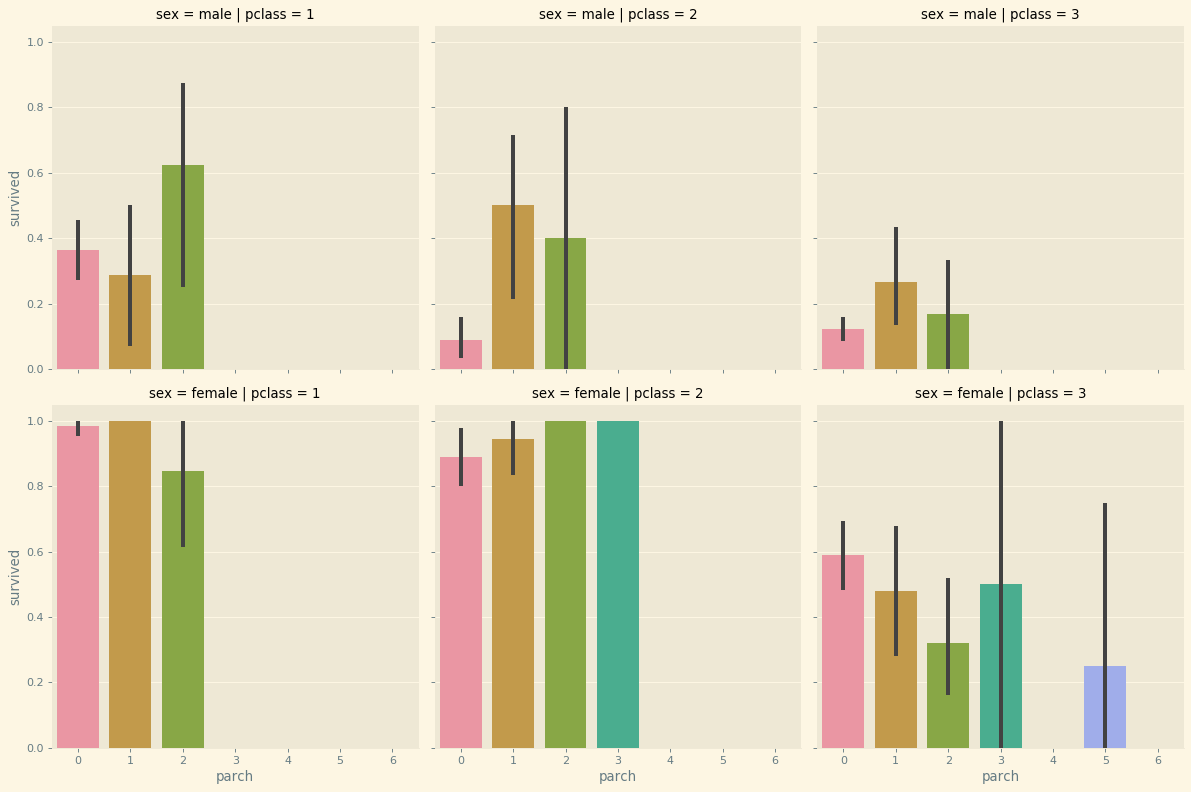

In [137]:
sns.catplot(x = 'parch', y = 'survived', kind = 'bar', data = df, col = 'pclass', row = 'sex');

## EMBARKED
    Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [99]:
df['embarked'].value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

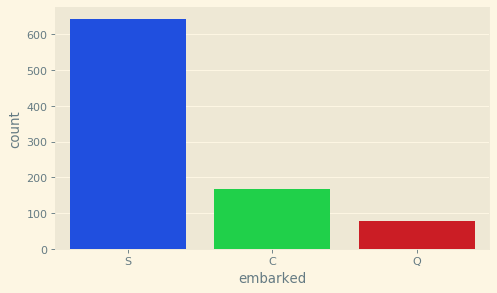

In [138]:
sns.countplot('embarked', data = df);

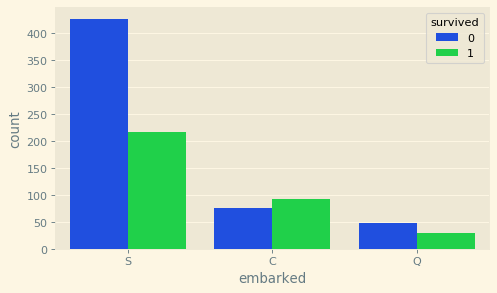

In [139]:
sns.countplot('embarked', data = df, hue = 'survived');

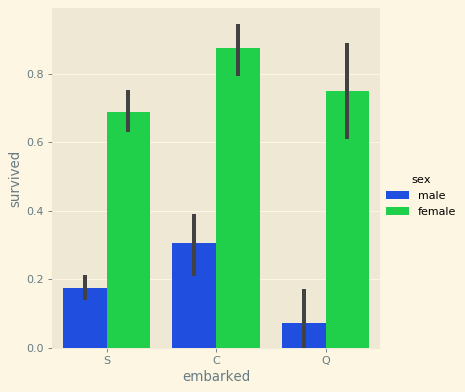

In [140]:
sns.catplot(x = 'embarked', y = 'survived', kind = 'bar', data = df, hue = 'sex');

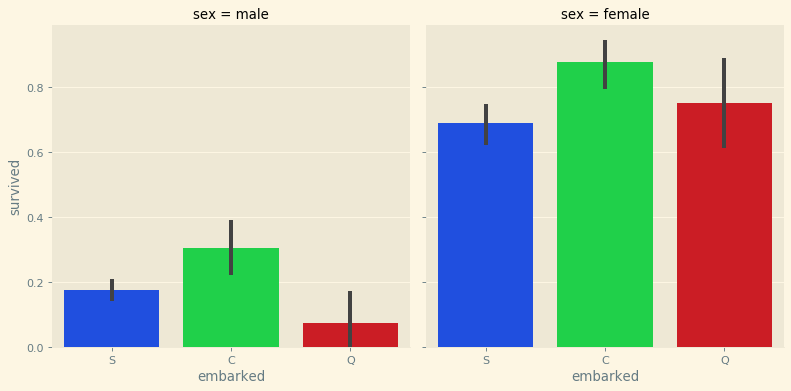

In [141]:
sns.catplot(x = 'embarked', y = 'survived', kind = 'bar', data = df, col = 'sex');

## WHO
    Man, Woman, Child

In [107]:
df['who'].value_counts()

man      537
woman    271
child     83
Name: who, dtype: int64

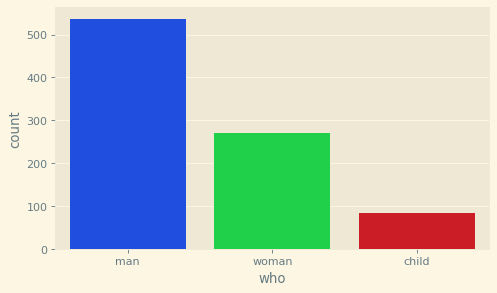

In [142]:
sns.countplot('who', data = df);

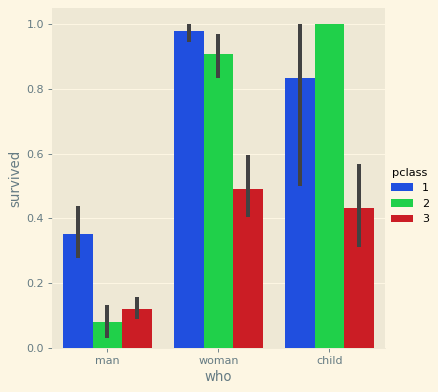

In [143]:
sns.catplot(x = 'who', y = 'survived', kind = 'bar', data = df, hue = 'pclass');

## END OF ANALYSIS...